In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset=pd.read_csv("train.csv")

In [5]:
ytrain=dataset["label"]
xtrain=dataset.drop("label",axis=1)

In [6]:
print(ytrain.shape,xtrain.shape)

(42000,) (42000, 784)


In [7]:
ytrain.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
xtrain=xtrain/255.0


In [9]:
xtrain=xtrain.values.reshape(-1,28,28,1)

In [10]:
from keras.utils.np_utils import to_categorical
ytrain=to_categorical(ytrain,num_classes=10)

In [11]:
from sklearn.model_selection import  train_test_split


In [12]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,random_state=101,train_size=0.75)

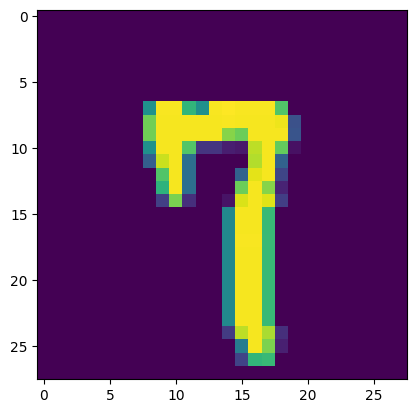

In [13]:
plt.imshow(xtrain[3])

In [14]:
xtrain.shape

(31500, 28, 28, 1)

In [15]:
ytrain.shape

(31500, 10)

In [16]:
import keras

In [17]:
import tensorflow as ts

In [18]:
model=keras.models.Sequential()

In [19]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [20]:
model.add(keras.layers.Dense(80,activation="relu"))
model.add(keras.layers.Dense(60,activation="relu"))
model.add(keras.layers.Dense(40,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [21]:
model.layers

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [23]:
history=model.fit(xtrain,ytrain,epochs=30,validation_data=(xval,yval))

Epoch 1/30
985/985 [==============================] - 5s 5ms/step - loss: 0.9824 - accuracy: 0.7203 - val_loss: 0.4204 - val_accuracy: 0.8820
Epoch 2/30
985/985 [==============================] - 4s 4ms/step - loss: 0.3597 - accuracy: 0.8964 - val_loss: 0.3046 - val_accuracy: 0.9120
Epoch 3/30
985/985 [==============================] - 3s 3ms/step - loss: 0.2870 - accuracy: 0.9155 - val_loss: 0.2715 - val_accuracy: 0.9231
Epoch 4/30
985/985 [==============================] - 3s 3ms/step - loss: 0.2479 - accuracy: 0.9274 - val_loss: 0.2402 - val_accuracy: 0.9269
Epoch 5/30
985/985 [==============================] - 4s 4ms/step - loss: 0.2182 - accuracy: 0.9356 - val_loss: 0.2193 - val_accuracy: 0.9339
Epoch 6/30
985/985 [==============================] - 3s 3ms/step - loss: 0.1944 - accuracy: 0.9418 - val_loss: 0.1956 - val_accuracy: 0.9416
Epoch 7/30
985/985 [==============================] - 3s 3ms/step - loss: 0.1773 - accuracy: 0.9485 - val_loss: 0.1887 - val_accuracy: 0.9430
Epoch 

<Axes: >

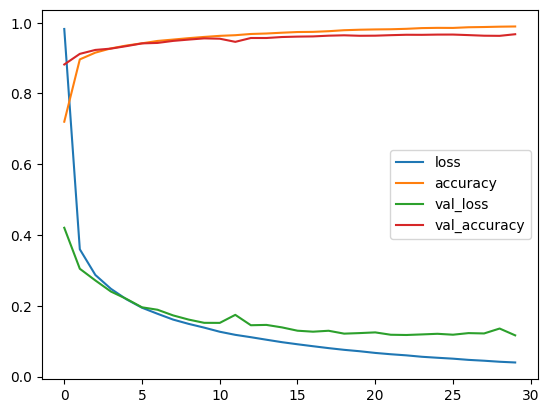

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
ypred=model.predict(xval)

329/329 [==============================] - 1s 2ms/step


In [26]:
ypredclass=np.argmax(ypred,axis=1)

In [27]:
ytrue=np.argmax(yval,axis=1)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(ytrue,ypredclass))

[[ 986    0    1    2    1    3    6    0    6    0]
 [   0 1129    9    4    2    0    1    4    5    0]
 [   5    4 1019    7    3    2    3   10    6    0]
 [   1    1   14 1029    0   13    0    5   14    5]
 [   0    1    2    0 1003    1    6    1    2   12]
 [   6    1    1   11    2  912    8    1    7    3]
 [   1    4    3    0    2    6 1005    0    2    0]
 [   2    0    5    4    4    1    1 1069    0    6]
 [   1    4    2    9    5    5    3    1  979    1]
 [   4    2    1   11   15    5    0   17   12 1028]]


In [30]:
v=pd.DataFrame(ytrue)

In [31]:
v.value_counts()

1    1154
9    1095
7    1092
3    1082
2    1059
4    1028
6    1023
8    1010
0    1005
5     952
dtype: int64